<a href="https://colab.research.google.com/github/JUANCHISCO/taller_economia_circular_1/blob/main/Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller: efecto de una arteria sobre los precios de la vivienda

##Importación de librerías y datos

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
datos = pd.read_csv('/content/datos.csv')

In [3]:
datos

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


##Exploración inicial

In [4]:
datos.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
5,14115,5,5,29,27,3,3,1,2,0,143000,0
6,10084,8,5,18,17,4,3,3,2,0,307000,0
7,10382,7,6,49,49,3,3,3,2,0,200000,0
8,6120,7,5,91,72,3,3,2,2,0,129900,1
9,7420,5,6,83,72,3,3,2,1,0,118000,1


In [5]:
datos.tail(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
1450,9000,5,5,48,48,3,3,4,0,0,136000,0
1451,9262,8,5,14,13,4,3,3,3,0,287090,0
1452,3675,5,5,17,17,3,3,2,2,0,145000,0
1453,17217,5,5,16,16,3,3,3,0,0,84500,0
1454,7500,7,5,18,17,4,3,2,2,0,185000,0
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0
1459,9937,5,6,57,57,4,3,3,1,0,147500,0


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


In [7]:
datos.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
BedroomAbvGr    0
GarageCars      0
PoolArea        0
SalePrice       0
Artery          0
dtype: int64

In [8]:
datos.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,50.732192,37.134247,3.39589,3.083562,2.866438,1.767123,2.758904,180921.195890,0.032877
std,9981.264932,1.382997,1.112799,30.202904,20.645407,0.57428,0.351054,0.815778,0.747315,40.177307,79442.502883,0.178375
min,1300.000000,1.000000,1.000000,12.000000,12.000000,2.00000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,5.000000,22.000000,18.000000,3.00000,3.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,5.000000,49.000000,28.000000,3.00000,3.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,6.000000,68.000000,55.000000,4.00000,3.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,9.000000,150.000000,72.000000,5.00000,5.000000,8.000000,4.000000,738.000000,755000.000000,1.000000


In [9]:
datos.shape

(1460, 12)

###Conclusión: En este apartado se observan 1460 datos, 12 variables y ningún dato faltante. Donde las variables son LotArea que representa el area del inmueble, OverallQual el cual explica la calidad general del inmueble, OverallCond representada como la condición general del inmueble, YearBuilt es el año de construcción, YearRemodAdd es el año de remodelación, ExterQual cuyo explicando la calidad de la fachada, ExterCond representando la condición de la fachada, BedroomAbvGr es el numero de habitaciones, GarageCars es el número de garajes, PoolArea es el área de la piscina, SalePrice donde representa el precio de venta y también es la variable objetivo y por último está Artery que significa si tiene o no una árteria cerca. Todos los datos evaluados son int 64 y también se encontraron los datos minimos, maximos, la media y mediana por cada variable.


##Verificación de duplicados

In [10]:
datos.duplicated().sum()

0

In [11]:
for i in datos.columns:
  print(i, datos[i].nunique())

LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
ExterQual 4
ExterCond 5
BedroomAbvGr 8
GarageCars 5
PoolArea 8
SalePrice 663
Artery 2


In [12]:
for i in datos.columns:
  print(datos[i].unique())

[ 8450  9600 11250 ... 17217 13175  9717]
[ 7  6  8  5  9  4 10  3  1  2]
[5 8 6 7 4 2 3 9 1]
[ 19  46  21 107  22  29  18  49  91  83  57  17  60  16  62  93  52  55
  64  92  20  54  15  71  65  95 102  56  63  28  68  69  67  39  47  25
  88  59  41  58  23  50 101  77  40  24  66  74 112  27  31  13  72  61
  45  37  43 137 103  32  53  87  34  51  70  86  99  98  38  96  82  81
  35  36  14 114 130 106  90 104 110  75  97 122  42  33  30  73 142  94
  44 100  26  12  76 109  85  80  84  48 129 108 116 132 124 118 140 147
 111 105 150 117]
[19 46 20 52 22 27 17 49 72 57 16 60 15 62 21 55 18 14 25 63 32 67 39 42
 56 59 35 58 50 26 24 33 69 66 54 41 30 13 40 61 29 23 37 43 45 53 64 31
 51 70 47 12 38 36 28 34 68 65 71 44 48]
[4 3 5 2]
[3 4 2 1 5]
[3 4 1 2 0 5 6 8]
[2 3 1 0 4]
[  0 512 648 576 555 480 519 738]
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300

###Aquí podemos observar que todas las variables excepto Artery que es una variable categorica (True or False). 

##Verificación de datos nulos

In [13]:
datos.isnull().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
BedroomAbvGr    0
GarageCars      0
PoolArea        0
SalePrice       0
Artery          0
dtype: int64

##Visualización de datos

##Visualización univariada

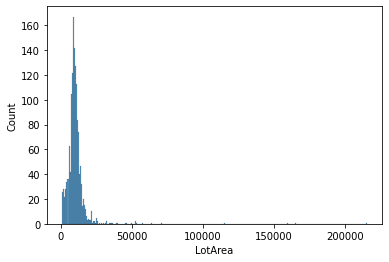

In [14]:
sns.histplot(datos['LotArea'])

### La mayoria de los inmuebles se concentran en un area menor a 25000 m^2y, por lo que se concluye que la muestra de los inmuebles en general se encuentra concentrada entre 0 y 25000 m^2 y algunos datos atipicos distribuidos a lo largo de 200000 m^2, siendo esta una variable continua

<BarContainer object of 10 artists>

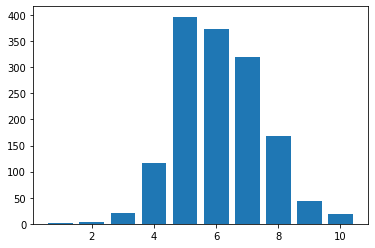

In [15]:
categoria= datos['OverallQual'].value_counts()
lis =[]
for i in categoria.index:
  lis.append(i)
plt.bar(lis, categoria.values)

###Se puede observar que la calidad del del inmueble es una variable categorica, pues se enfoca en 10 posibles opciones, donde 5 y 6 es la opción más elegida, evaludada por cada inmueble.

<BarContainer object of 9 artists>

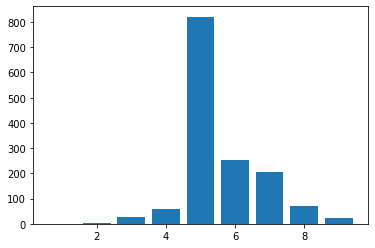

In [16]:
categoria= datos['OverallCond'].value_counts()
lis =[]
for i in categoria.index:
  lis.append(i)
plt.bar(lis, categoria.values)

### Las condiciones generales de los inmuebles son (al igual que la calidad del inmueble) mayormente evaluadas en la opción 5, pues representa la capacidad de la vivienda.

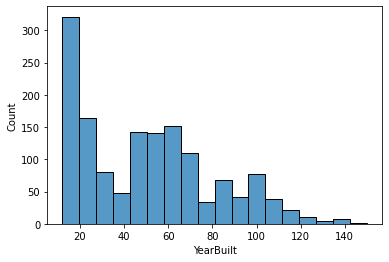

In [17]:
sns.histplot(datos['YearBuilt'])

### La mayoria de los datos se concentran en las primeras fechas, haciendo referencia a que son más antiguas, además seignifica que dicha variable es continua.

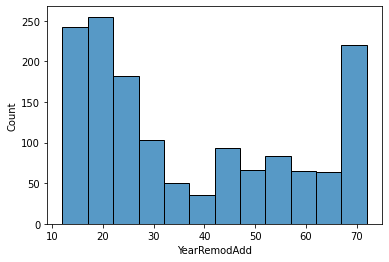

In [18]:
sns.histplot(datos['YearRemodAdd'])

### El año de remodelación se encurntra relativamente distribuido en la mayoria de las fechas establecidad, auqnue se existe mayor concentración en 10 y 20, siendo esta una variable continua.

<BarContainer object of 4 artists>

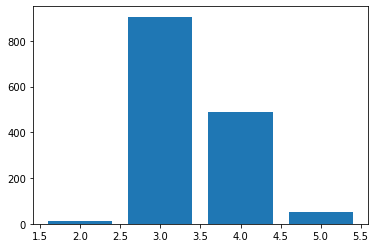

In [19]:
categoria= datos['ExterQual'].value_counts()
lis =[]
for i in categoria.index:
  lis.append(i)
plt.bar(lis, categoria.values)

### La calidad de la fachada es una variable categorica, pues es evaluada en un rango limitado cuyo rango es de 1 a 5, siendo 5 el mejor evaluado. Por otro lado se evidencia una cocnentración en 3 y se explica esta variable como una categoria.

<BarContainer object of 5 artists>

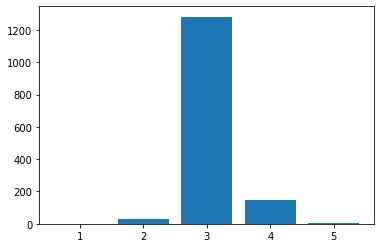

In [20]:
categoria= datos['ExterCond'].value_counts()
lis =[]
for i in categoria.index:
  lis.append(i)
plt.bar(lis, categoria.values)

### La condicion de la fachada esta mayormente concentrada en el 3 y es una variable categorica representada como una valoración fija.

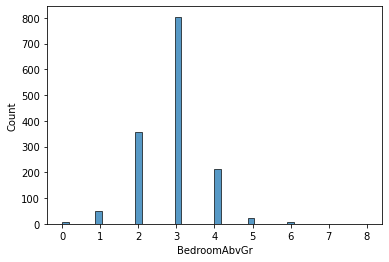

In [21]:
sns.histplot(datos['BedroomAbvGr'])


### El numero de habitaciones es una variable continua puesto que no es una clasificación de exacata y su limite se debe al inmueble evaluado. También se encuentra mayormente concentrada en 3.

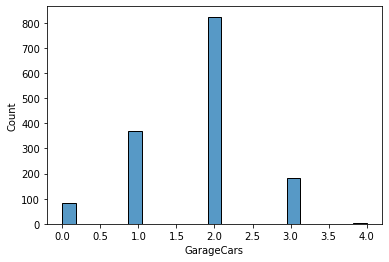

In [22]:
sns.histplot(datos['GarageCars'])

### El número de garajes es una variable continua concentrada en 2.

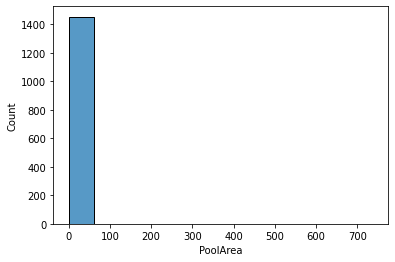

In [23]:
sns.histplot(datos['PoolArea'])

### El area de la piscina se concentra en 0 aunque existen más datos en diferentes valores y se establece como una variable continua.

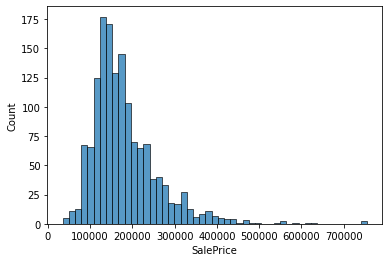

In [24]:
sns.histplot(datos['SalePrice'])

### El precio de la vivienda se establece como una variable continua y su concentración está en 15000

<BarContainer object of 2 artists>

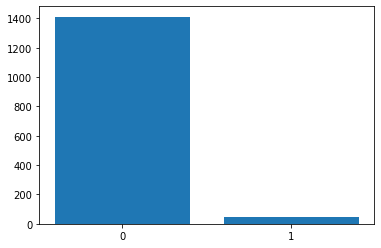

In [25]:
categoria= datos['Artery'].value_counts()
categoria.index = ['0','1']
plt.bar(categoria.index, categoria.values)

### Esta variable es categorica y se concentra en 0, que significa que la mayoria de los inmuebles si viven cerca a una vía principal.

##Visualización bivariada

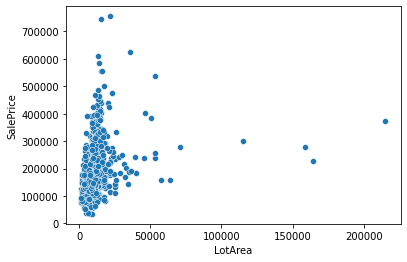

In [26]:
sns.scatterplot(data = datos, x= 'LotArea', y='SalePrice')

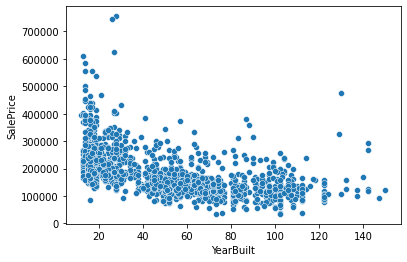

In [27]:
sns.scatterplot(data = datos, x= 'YearBuilt', y='SalePrice')

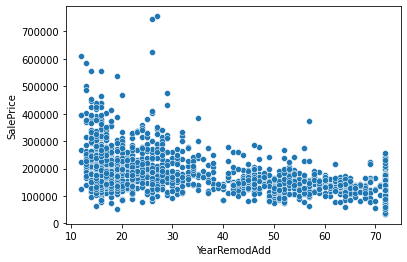

In [28]:
sns.scatterplot(data = datos, x= 'YearRemodAdd', y='SalePrice')

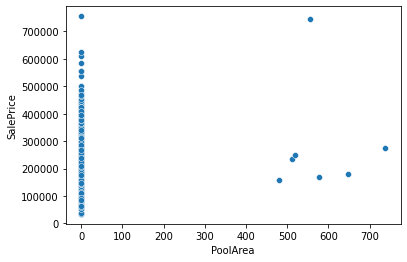

In [29]:
sns.scatterplot(data = datos, x= 'PoolArea', y='SalePrice')

In [30]:
datos.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'ExterCond', 'BedroomAbvGr', 'GarageCars', 'PoolArea',
       'SalePrice', 'Artery'],
      dtype='object')

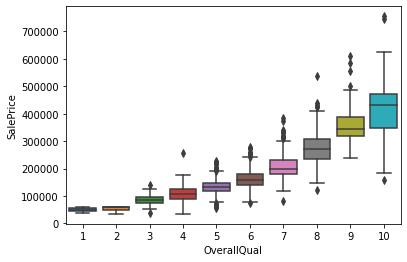

In [31]:
sns.boxplot(data=datos, x='OverallQual', y='SalePrice')

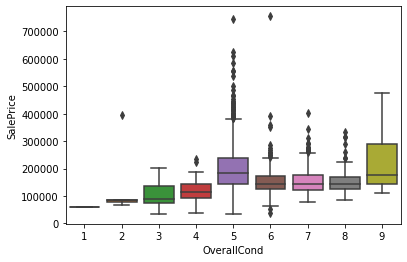

In [32]:
sns.boxplot(data=datos, x='OverallCond', y='SalePrice')

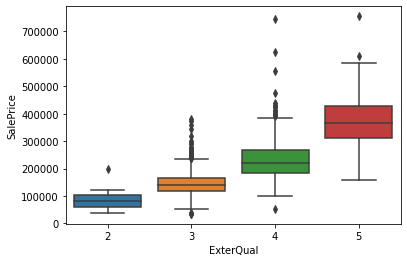

In [33]:
sns.boxplot(data=datos, x='ExterQual', y='SalePrice')

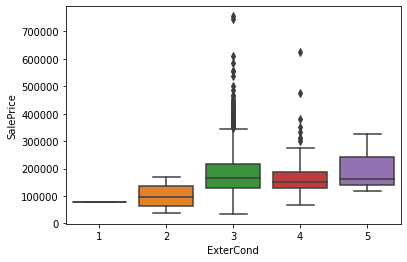

In [34]:
sns.boxplot(data=datos, x='ExterCond', y='SalePrice')

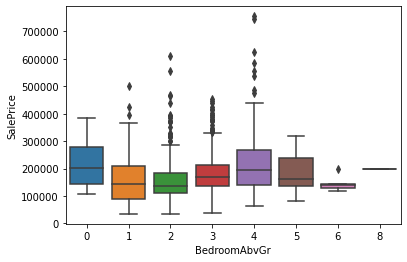

In [35]:
sns.boxplot(data=datos, x='BedroomAbvGr', y='SalePrice')

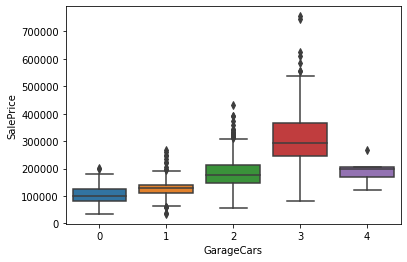

In [36]:
sns.boxplot(data=datos, x='GarageCars', y='SalePrice')

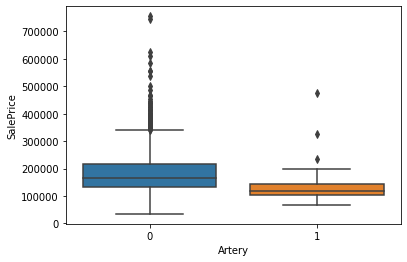

In [37]:
sns.boxplot(data=datos, x='Artery', y='SalePrice')

##Análisis de correlación

In [38]:
datos.corr('pearson')

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.055570,0.014732,0.119690,0.154871,0.077672,0.263843,-0.009526
OverallQual,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.726278,0.013953,0.101676,0.600671,0.065166,0.790982,-0.068812
OverallCond,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.138942,0.389163,0.012980,-0.185758,-0.001985,-0.077856,0.080743
YearBuilt,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.598160,0.103925,0.070651,-0.537850,-0.004950,-0.522897,0.233179
YearRemodAdd,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.587318,-0.074745,0.040581,-0.420622,-0.005829,-0.507101,0.164073
ExterQual,0.055570,0.726278,-0.138942,-0.598160,-0.587318,1.000000,0.009184,-0.018729,0.526390,0.034766,0.682639,-0.100382
ExterCond,0.014732,0.013953,0.389163,0.103925,-0.074745,0.009184,1.000000,0.015065,-0.009377,0.044387,0.018899,0.076499
BedroomAbvGr,0.119690,0.101676,0.012980,0.070651,0.040581,-0.018729,0.015065,1.000000,0.086106,0.070703,0.168213,0.049038
GarageCars,0.154871,0.600671,-0.185758,-0.537850,-0.420622,0.526390,-0.009377,0.086106,1.000000,0.020934,0.640409,-0.071068
PoolArea,0.077672,0.065166,-0.001985,-0.004950,-0.005829,0.034766,0.044387,0.070703,0.020934,1.000000,0.092404,0.036302


In [39]:
datos.corr('spearman')

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.233303,-0.046912,-0.103385,-0.075158,0.148995,0.032046,0.337788,0.340195,0.084460,0.456461,-0.024566
OverallQual,0.233303,1.000000,-0.177521,-0.647392,-0.557723,0.715988,-0.015870,0.121517,0.608756,0.056667,0.809829,-0.081717
OverallCond,-0.046912,-0.177521,1.000000,0.416964,0.041464,-0.228402,0.329091,-0.003713,-0.254763,-0.005605,-0.129325,0.079480
YearBuilt,-0.103385,-0.647392,0.416964,1.000000,0.684388,-0.678997,0.116672,0.035257,-0.601519,-0.008986,-0.652682,0.219426
YearRemodAdd,-0.075158,-0.557723,0.041464,0.684388,1.000000,-0.631327,-0.043496,0.054371,-0.456245,-0.002821,-0.571159,0.154949
ExterQual,0.148995,0.715988,-0.228402,-0.678997,-0.631327,1.000000,-0.007822,0.010209,0.542498,0.033574,0.684014,-0.107414
ExterCond,0.032046,-0.015870,0.329091,0.116672,-0.043496,-0.007822,1.000000,0.024243,-0.036854,0.041834,0.011682,0.071515
BedroomAbvGr,0.337788,0.121517,-0.003713,0.035257,0.054371,0.010209,0.024243,1.000000,0.118497,0.071734,0.234907,0.030117
GarageCars,0.340195,0.608756,-0.254763,-0.601519,-0.456245,0.542498,-0.036854,0.118497,1.000000,0.021783,0.690711,-0.081109
PoolArea,0.084460,0.056667,-0.005605,-0.008986,-0.002821,0.033574,0.041834,0.071734,0.021783,1.000000,0.058453,0.042658


##Modelamiento

In [41]:
x = datos[['Artery', 'LotArea', 'BedroomAbvGr', 'GarageCars', 'YearBuilt', 'OverallCond']]

In [42]:
y = datos['SalePrice'] 

In [57]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              2853.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                        0.00
Time:                        00:45:05   Log-Likelihood:                         -18015.
No. Observations:                1460   AIC:                                  3.604e+04
Df Residuals:                    1454   BIC:                                  3.607e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Artery       -7388.8986   8363.014     -0.884      0.377   -2.38e+04    9015.963
LotArea          1.4044      0.148      9.470      0.000       1.113       1.695
BedroomAbvGr  1.571e+04   1646.392      9.544      0.000    1.25e+04    1.89e+04
GarageCars    5.137e+04   2093.376     24.541      0.000    4.73e+04    5.55e+04
YearBuilt     -841.1538     61.378    -13.704      0.000    -961.553    -720.754
OverallCond     1.3e+04   1047.251     12.410      0.000    1.09e+04    1.51e+04
==============================================================================
Omnibus:                      705.807   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7380.981
Skew:                           1.994   Prob(JB):                         0.00
Kurtosis:                      13.268   Cond. No.                     8.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Interpretación del modelo

###Se evidencia un efecto negativo de la existencia de una arteria vial cerca del inmueble, por lo que una vivienda cerca de una vía principal disminuiría su precio, el área del lote por su parte representa un efecto positivo sobre el precio del inmueble, el número de habitaciones también representa un efecto positivo sobre el precio del inmueble, lo mismo ocurre con el número de garaje, el cual incrementa el precio de la vivienda a medida que aumenta el número de estos, por otro lado, ocurre el efecto contrario cuando se trata de los años de antigüedad, puesto que  medida que la vivienda tiene más años de antigüedad esta va reduciendo su precio, la condición de la vivienda produce un efecto positivo sobre el precio final de la vivienda


##Conclusiones generales

Dentro del análisis de los datos presentes en el dataset se resalta el efecto negativo que produce la existencia de una arteria vial sobre el precio de la vivienda, puesto que lo que indica el modelo es que dicho efecto es negativo, siendo contrario a lo que se presumiría inicialmente lo cual seria que la existencia de dicha arteria significa un crecimiento en el precio del inmueble. Por otro lado, con respecto a las demás variables dependientes, se produce el efecto que se esperaría sobre el precio del inmueble